# LGBM & XGBM

### Objective:
The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 

#### Exploratory Data Analysis (EDA):
+ Load the Titanic dataset using Python's pandas library.
+ Check for missing values.
+ Explore data distributions using histograms and box plots.
+ Visualize relationships between features and survival using scatter plots and bar plots.
#### Data Preprocessing:
+ Impute missing values.
+ Encode categorical variables using one-hot encoding or label encoding. 
+ If needed you can apply more preprocessing methods on the given dataset.
#### Building Predictive Models:
+ Split the preprocessed dataset into training and testing sets.
+ Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
+ Build predictive models using LightGBM and XGBoost algorithms.
+ Train the models on the training set and evaluate their performance on the testing set.
+ Use techniques like cross-validation and hyperparameter tuning to optimize model performance.
#### Comparative Analysis:
+ Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
+ Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.
#### Submission Requirements:
Well-commented code explaining each step of the analysis.
Visualizations with appropriate titles and labels.
A brief report summarizing the comparative analysis results and practical implications.


#### Exploratory Data Analysis (EDA):
+ Load the Titanic dataset using Python's pandas library.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Here both test and train dataset is been combined together so that it will be easy to preprocess dataset. 
import pandas as pd

# Load datasets
train = pd.read_csv("Titanic_train.csv")
test = pd.read_csv("Titanic_test.csv")

# Merge both datasets
data = pd.concat([train, test], axis=0) 

print(data.shape)


(1309, 12)


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


+ Check for missing values.


In [4]:
# Null value is found at Survived,age,Fare,Cabin & Embarked.
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [5]:
data = data.dropna(subset=['Cabin'])

In [6]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [7]:
# To deal with null value,I have replaced all missing values with the mean of their respective columns used this to avoid data loss.
data.fillna(data.mean(), inplace=True)
data.isnull().sum()
# No more null values present in dataset.

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

+ Explore data distributions using histograms and box plots.

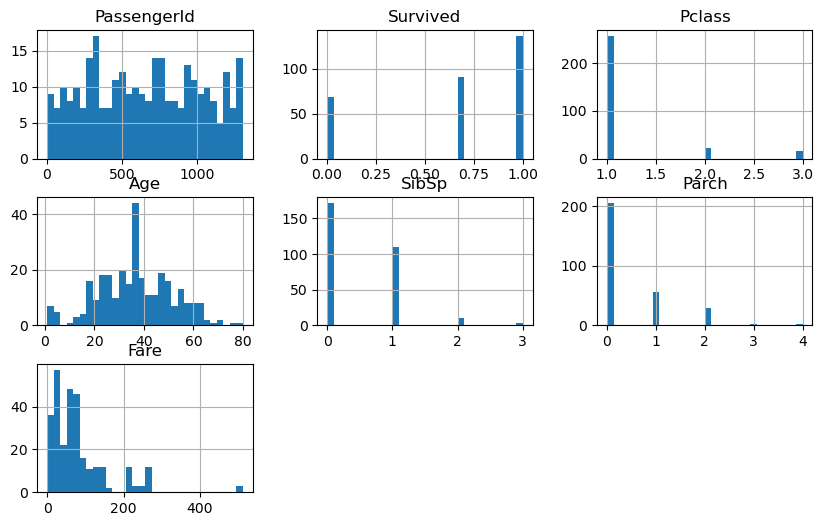

In [8]:
# Histogram plots.
import matplotlib.pyplot as plt
data.hist(figsize=(10, 6), bins=30)
plt.show()

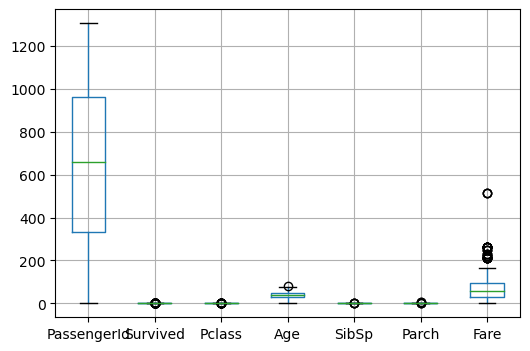

In [9]:
# Box plot
data.boxplot(figsize=(6, 4))
plt.show()

+ Visualize relationships between features and survival using scatter plots and bar plots.

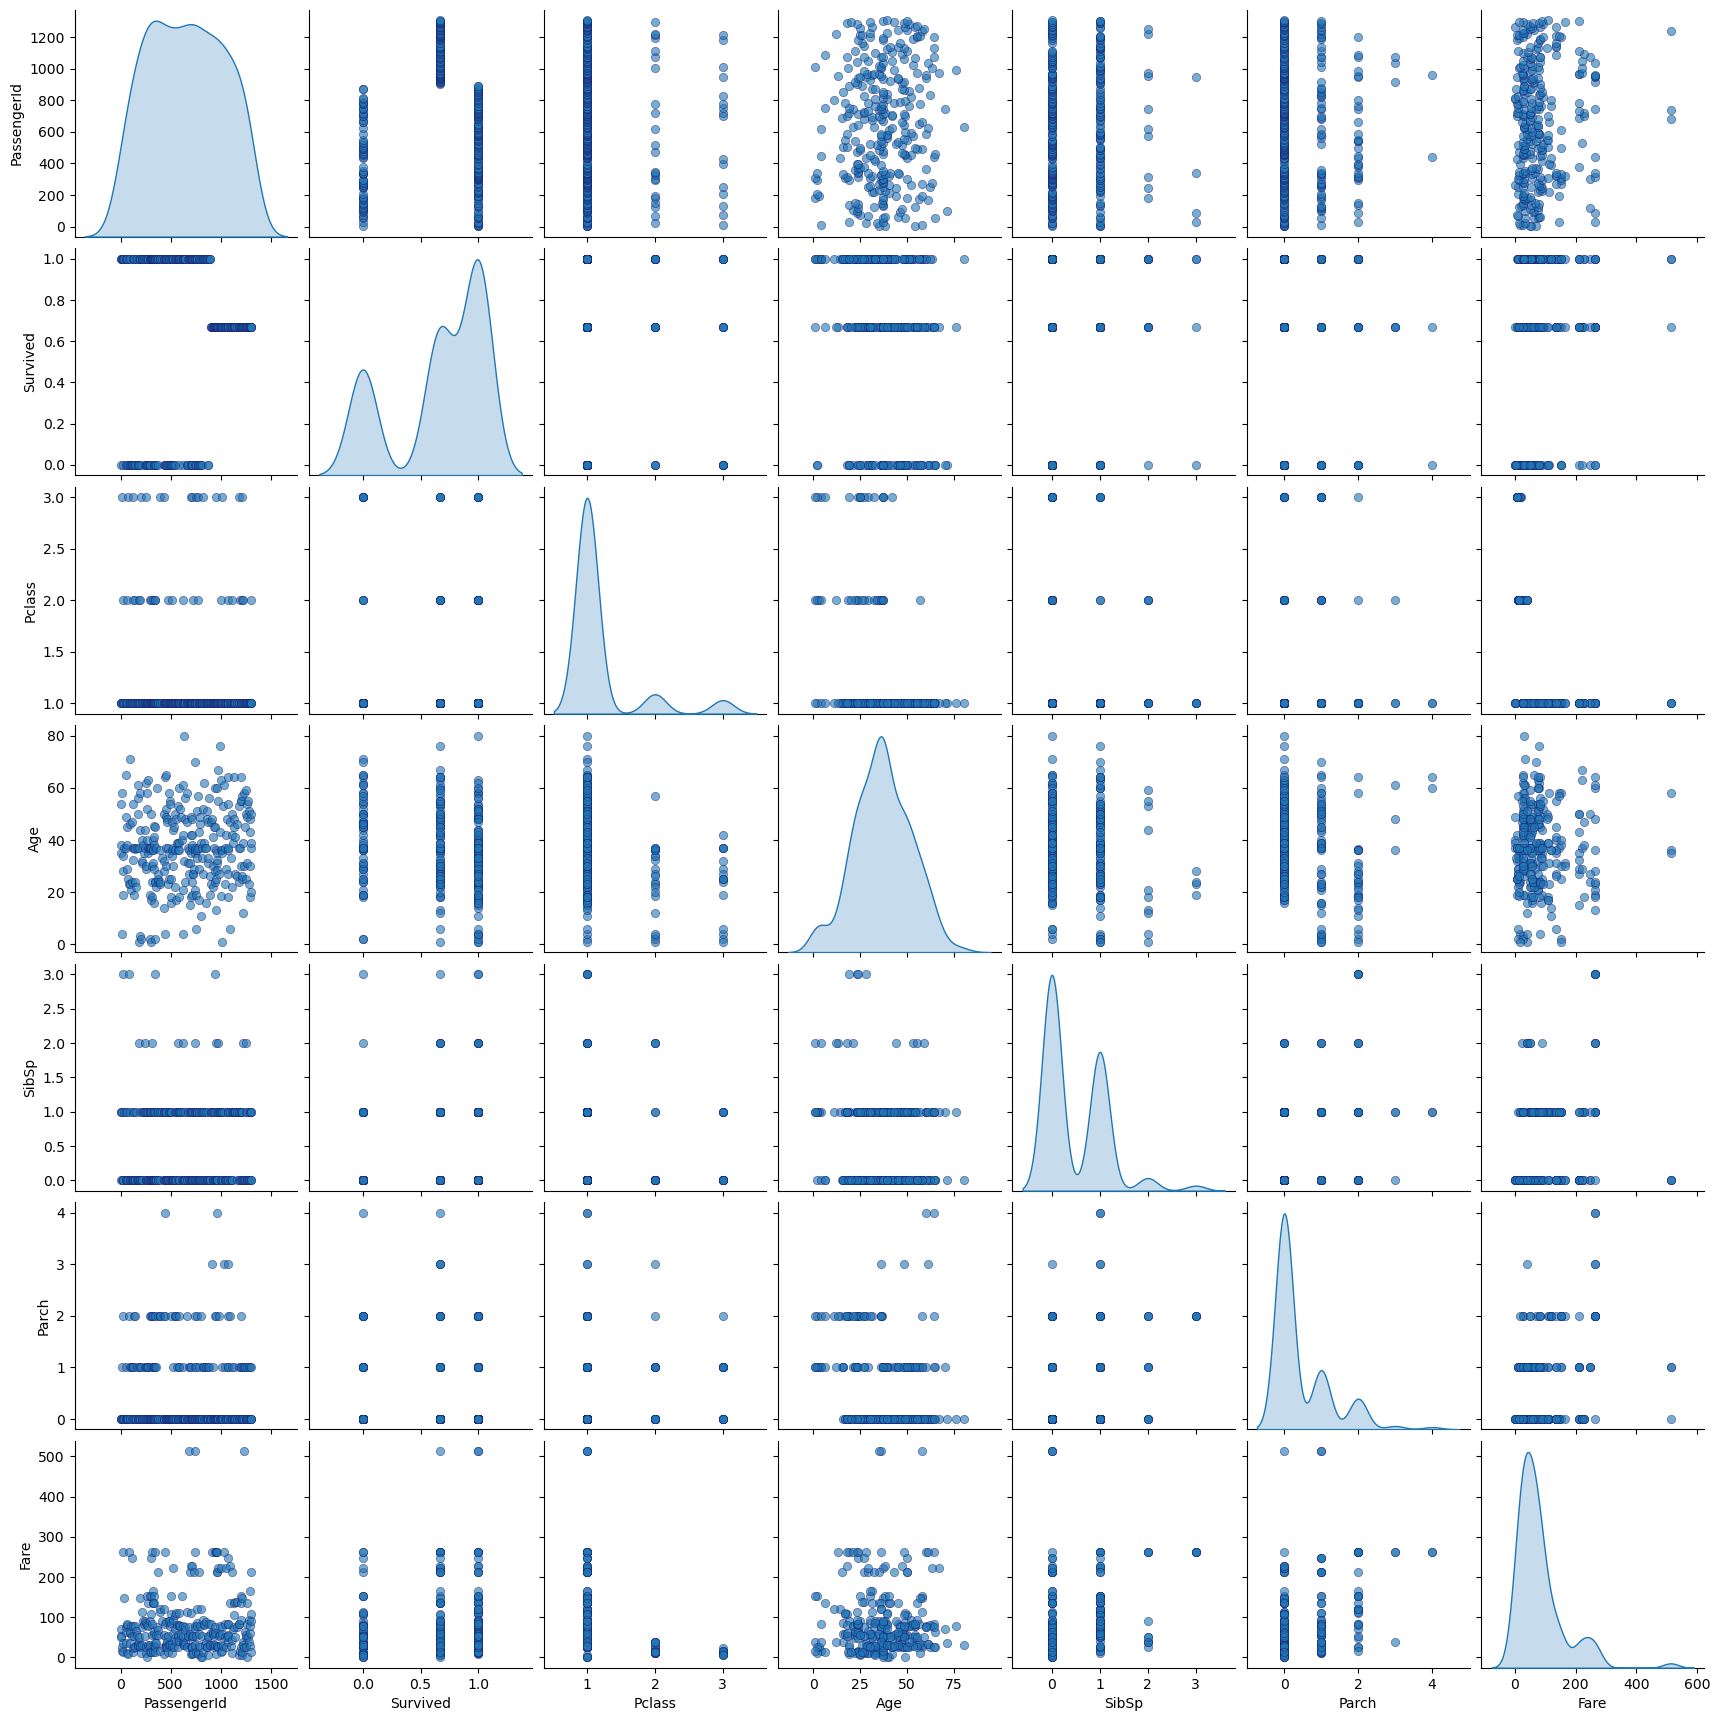

In [10]:
import seaborn as sns


# Pairplot for all numerical columns
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 0.6, 'edgecolor': 'midnightblue'})
plt.show()


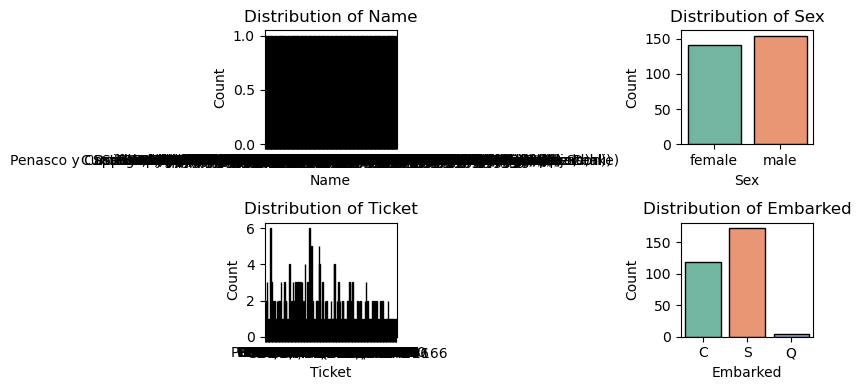

In [11]:
# Bar plot
cat_cols = ['Name', 'Sex', 'Ticket', 'Embarked']

fig, axes = plt.subplots(2, 2, figsize=(8, 4))
for ax, col in zip(axes.flatten(), cat_cols):
    sns.countplot(x=data[col], palette='Set2', ax=ax, edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


#### Data Preprocessing:

+ Impute missing values.

######  To deal with null value,I have already replaced all missing values with the mean of their respective columns, I have used this to avoid data loss. No more null values present in dataset. Unknow value is been added to Cabins null value and Emarked null value is also filled.

+ Encode categorical variables using one-hot encoding or label encoding. 

In [12]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode categorical variables
label_enc = LabelEncoder()
data['Sex'] = label_enc.fit_transform(data['Sex'])
data['Embarked'] = label_enc.fit_transform(data['Embarked'])
data['Cabin'] = label_enc.fit_transform(data['Cabin'])  

In [13]:
# Drop Name and Ticket if not needed
data = data.drop(columns=['Name', 'Ticket'], errors='ignore')

In [14]:
# Convert DataFrame to numeric type
data = data.apply(pd.to_numeric, errors='coerce')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 1 to 414
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Survived     295 non-null    float64
 2   Pclass       295 non-null    int64  
 3   Sex          295 non-null    int32  
 4   Age          295 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Fare         295 non-null    float64
 8   Cabin        295 non-null    int32  
 9   Embarked     295 non-null    int32  
dtypes: float64(3), int32(3), int64(4)
memory usage: 21.9 KB


+ If needed you can apply more preprocessing methods on the given dataset.

###### No need to preprocess the data because in the process of preprocessing enough dataset is been lost.

#### Building Predictive Models:

+ Split the preprocessed dataset into training and testing sets.

In [16]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Survived', 'PassengerId'])
y = data['Survived'].astype(int) 

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((236, 8), (59, 8), (236,), (59,))

+ Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation. 

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Initialize and train the SVM model
model = SVC(C=10, gamma=0.01, kernel='rbf')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_train)

# Evaluate the model
cm = confusion_matrix(y_train, y_pred)

In [19]:
print("\nClassification Report:\n", classification_report(y_train, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       126
           1       0.96      0.98      0.97       110

    accuracy                           0.97       236
   macro avg       0.97      0.98      0.97       236
weighted avg       0.97      0.97      0.97       236



+ Build predictive models using LightGBM and XGBoost algorithms.Train the models on the training set and evaluate their performance on the testing set.Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

###### XGBoost algorithms.

In [20]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

clf = xgb.XGBClassifier()
# Set up parameters for grid search
parameters = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                'max_depth': [2, 4, 6, 8, 10],
                'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]
                }

In [21]:
# Set up grid search
grid_search = GridSearchCV(estimator=clf, param_grid=parameters, 
                           scoring='accuracy', 
                           cv=5, 
                           n_jobs=-1)

In [22]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100],
                         'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]},
             scoring='accuracy')

In [23]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 40, 'subsample': 0.8}

In [24]:
best_model = grid_search.best_estimator_

###### LightGBM algorithms.

In [25]:
import lightgbm as lgb
params = {
    'num_leaves': [8,12,24,32],
    'learning_rate': [0.05,0.01,0.02,0.001],
    'feature_fraction': [0.9,0.8,0.7,0.6,0.5],
    'bagging_fraction': [0.9,0.8,0.7,0.6,0.5],
}

In [26]:
lg_clf = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='binary_logloss')

In [27]:
lggrid_search = GridSearchCV(estimator=lg_clf, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)

In [28]:
lggrid_search.fit(X_train,y_train) 

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Info] Number of positive: 110, number of negative: 126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 236, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.466102 -> initscore=-0.135802
[LightGBM] [Info] Star

GridSearchCV(cv=5,
             estimator=LGBMClassifier(metric='binary_logloss',
                                      objective='binary'),
             n_jobs=-1,
             param_grid={'bagging_fraction': [0.9, 0.8, 0.7, 0.6, 0.5],
                         'feature_fraction': [0.9, 0.8, 0.7, 0.6, 0.5],
                         'learning_rate': [0.05, 0.01, 0.02, 0.001],
                         'num_leaves': [8, 12, 24, 32]},
             scoring='accuracy')

In [29]:
lggrid_search.best_params_

{'bagging_fraction': 0.9,
 'feature_fraction': 0.9,
 'learning_rate': 0.01,
 'num_leaves': 8}

In [30]:
lg_model = lggrid_search.best_estimator_
lg_model

LGBMClassifier(bagging_fraction=0.9, feature_fraction=0.9, learning_rate=0.01,
               metric='binary_logloss', num_leaves=8, objective='binary')

#### Comparative Analysis:
+ Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models and Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

###### xgboost performance matric 

In [31]:
Xg_yhat_train = best_model.predict(X_train)
cm = confusion_matrix(y_train,Xg_yhat_train)

In [32]:
print(classification_report(y_train,Xg_yhat_train))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       126
           1       0.78      0.64      0.70       110

    accuracy                           0.75       236
   macro avg       0.75      0.74      0.74       236
weighted avg       0.75      0.75      0.74       236



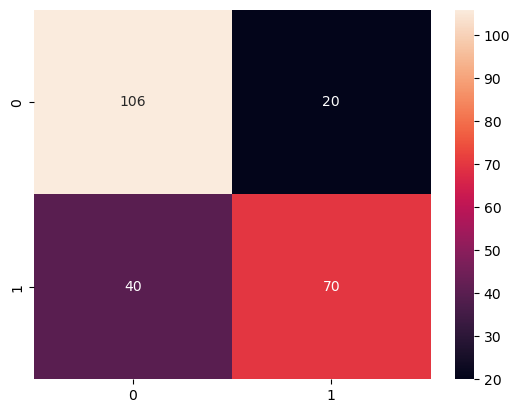

In [33]:
sns.heatmap(cm, annot=True,fmt='d')
plt.show()

###### lightgbm performance matric 

In [34]:
lg_yhat_train = lg_model.predict(X_train)
lg_cm = confusion_matrix(y_train,lg_yhat_train)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


In [35]:
print(classification_report(y_train,lg_yhat_train))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75       126
           1       0.75      0.55      0.64       110

    accuracy                           0.71       236
   macro avg       0.72      0.70      0.70       236
weighted avg       0.72      0.71      0.70       236



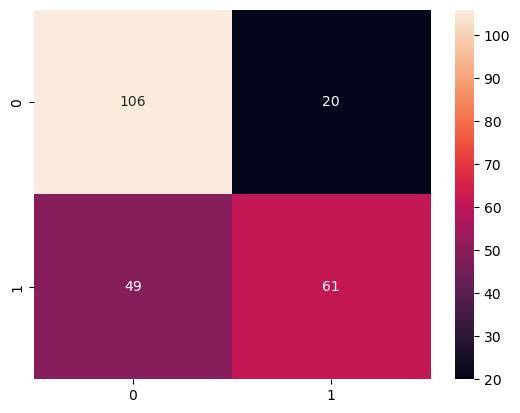

In [36]:
sns.heatmap(lg_cm, annot=True,fmt='d')
plt.show()

###### A brief report summarizing the comparative analysis results and practical implications.
The comparative analysis of XGBoost and LightGBM models reveals that XGBoost outperforms LightGBM in accuracy (75% vs. 71%). XGBoost has better recall for class 0 (84%) but lower for class 1 (64%), while LightGBM shows a more balanced recall but struggles with class 1 predictions. This suggests that XGBoost is more effective overall, but LightGBM might need further tuning for better generalization.